# Análisis Exploratorio - Proyecto de Registro de Imágenes

**Proyecto:** Fusión de Perspectivas - Registro de Imágenes

**Objetivo:** Explorar las imágenes del comedor y planificar el pipeline de registro.

## Contenido
1. Carga y visualización de imágenes
2. Análisis de propiedades de las imágenes
3. Identificación de regiones de interés
4. Planificación del registro

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejores visualizaciones
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas correctamente")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Bibliotecas importadas correctamente
OpenCV version: 4.12.0
NumPy version: 2.2.6


## 1. Carga de Imágenes

Verificamos que las imágenes existan y las cargamos.

In [2]:
# Verificar existencia de imágenes
rutas_imagenes = [
    '../data/original/cuadro_virgen_guadalupe.jpg',
    '../data/original/IMG02.jpg',
    '../data/original/IMG03.jpg'
]

print("\n" + "="*60)
print("VERIFICANDO IMÁGENES")
print("="*60 + "\n")

for ruta in rutas_imagenes:
    existe = os.path.exists(ruta)
    simbolo = "✓" if existe else "✗"
    print(f"{simbolo} {os.path.basename(ruta)}: {'Encontrada' if existe else 'NO ENCONTRADA'}")

print("\n⚠️ Si alguna imagen no fue encontrada, cópiala a la carpeta data/original/")


VERIFICANDO IMÁGENES

✓ cuadro_virgen_guadalupe.jpg: Encontrada
✓ IMG02.jpg: Encontrada
✓ IMG03.jpg: Encontrada

⚠️ Si alguna imagen no fue encontrada, cópiala a la carpeta data/original/


In [3]:
# Cargar imágenes
imagenes = []
nombres = []

for ruta in rutas_imagenes:
    if os.path.exists(ruta):
        img = cv2.imread(ruta)
        if img is not None:
            imagenes.append(img)
            nombres.append(os.path.basename(ruta))

print(f"\n✅ Cargadas {len(imagenes)} imágenes")


✅ Cargadas 3 imágenes


## 2. Visualización de Imágenes Originales

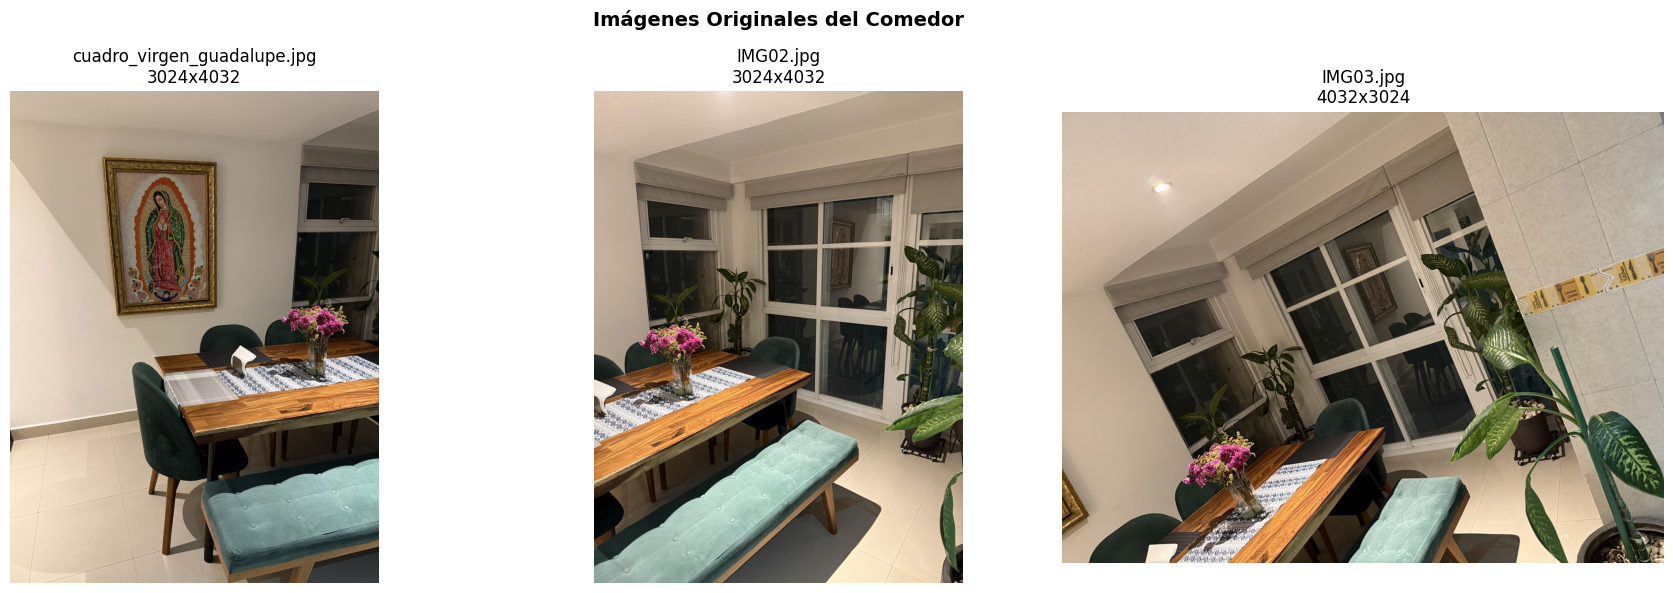

In [4]:
if len(imagenes) > 0:
    n_imgs = len(imagenes)
    fig, axes = plt.subplots(1, n_imgs, figsize=(6*n_imgs, 6))
    
    if n_imgs == 1:
        axes = [axes]
    
    for i, (img, nombre) in enumerate(zip(imagenes, nombres)):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(f'{nombre}\n{img.shape[1]}x{img.shape[0]}', fontsize=12)
        axes[i].axis('off')
    
    plt.suptitle('Imágenes Originales del Comedor', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No hay imágenes para visualizar")

## 3. Análisis de Propiedades

In [5]:
if len(imagenes) > 0:
    print("\n" + "="*60)
    print("PROPIEDADES DE LAS IMÁGENES")
    print("="*60 + "\n")
    
    for nombre, img in zip(nombres, imagenes):
        h, w, c = img.shape
        aspect_ratio = w / h
        megapixels = (w * h) / 1_000_000
        
        print(f"📷 {nombre}")
        print(f"   Dimensiones:     {w} x {h} píxeles")
        print(f"   Canales:         {c}")
        print(f"   Relación aspecto: {aspect_ratio:.2f}")
        print(f"   Megapíxeles:     {megapixels:.2f} MP")
        print(f"   Tipo de datos:   {img.dtype}")
        print()


PROPIEDADES DE LAS IMÁGENES

📷 cuadro_virgen_guadalupe.jpg
   Dimensiones:     3024 x 4032 píxeles
   Canales:         3
   Relación aspecto: 0.75
   Megapíxeles:     12.19 MP
   Tipo de datos:   uint8

📷 IMG02.jpg
   Dimensiones:     3024 x 4032 píxeles
   Canales:         3
   Relación aspecto: 0.75
   Megapíxeles:     12.19 MP
   Tipo de datos:   uint8

📷 IMG03.jpg
   Dimensiones:     4032 x 3024 píxeles
   Canales:         3
   Relación aspecto: 1.33
   Megapíxeles:     12.19 MP
   Tipo de datos:   uint8



## 4. Análisis de Histogramas

Analizamos la distribución de intensidades de cada imagen.

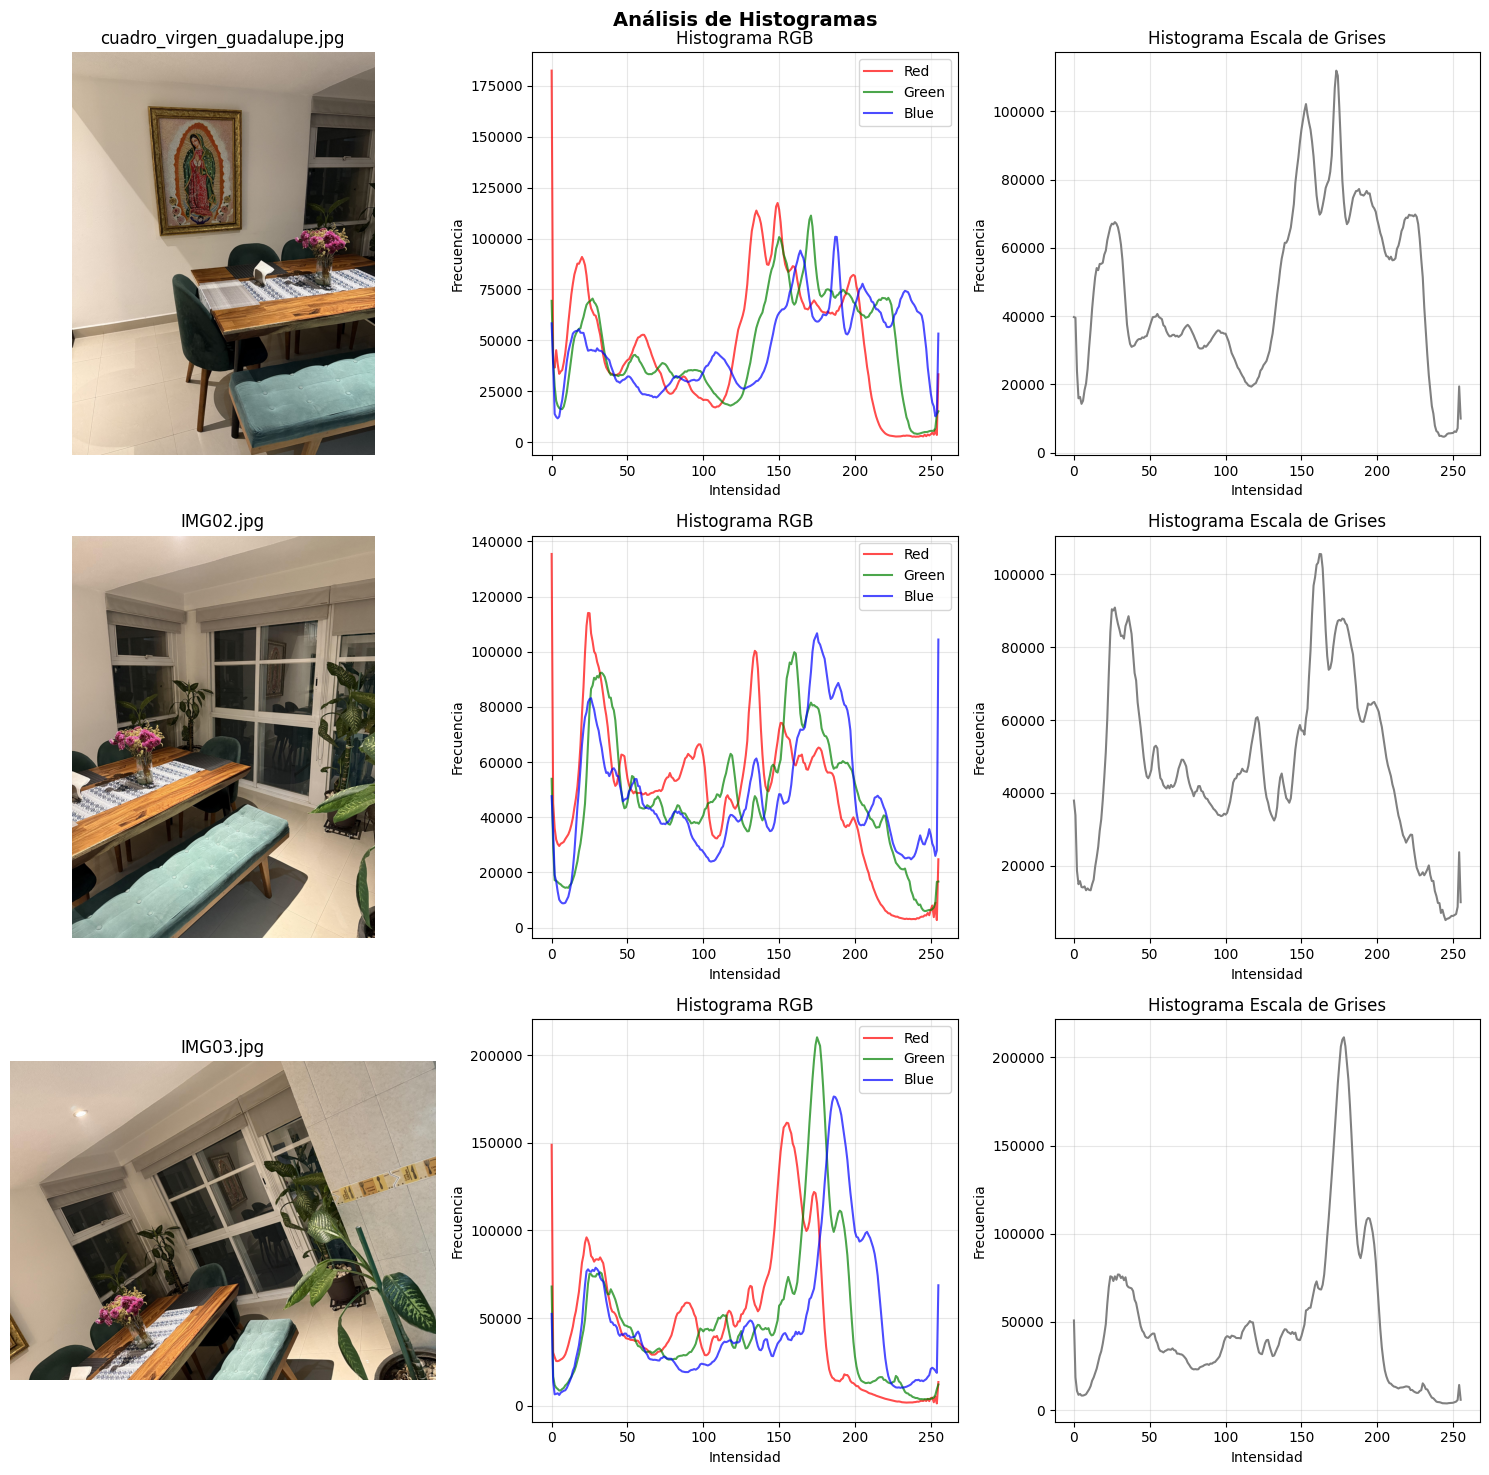

In [6]:
if len(imagenes) > 0:
    fig, axes = plt.subplots(len(imagenes), 3, figsize=(15, 5*len(imagenes)))
    
    if len(imagenes) == 1:
        axes = axes.reshape(1, -1)
    
    colores = ['red', 'green', 'blue']
    nombres_canales = ['Red', 'Green', 'Blue']
    
    for i, (img, nombre) in enumerate(zip(imagenes, nombres)):
        # Imagen
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i, 0].imshow(img_rgb)
        axes[i, 0].set_title(nombre, fontsize=12)
        axes[i, 0].axis('off')
        
        # Histogramas RGB
        for c in range(3):
            hist = cv2.calcHist([img], [c], None, [256], [0, 256])
            axes[i, 1].plot(hist, color=colores[c], alpha=0.7, label=nombres_canales[c])
        axes[i, 1].set_title('Histograma RGB', fontsize=12)
        axes[i, 1].set_xlabel('Intensidad')
        axes[i, 1].set_ylabel('Frecuencia')
        axes[i, 1].legend()
        axes[i, 1].grid(True, alpha=0.3)
        
        # Histograma escala de grises
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
        axes[i, 2].plot(hist_gray, color='gray')
        axes[i, 2].set_title('Histograma Escala de Grises', fontsize=12)
        axes[i, 2].set_xlabel('Intensidad')
        axes[i, 2].set_ylabel('Frecuencia')
        axes[i, 2].grid(True, alpha=0.3)
    
    plt.suptitle('Análisis de Histogramas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 5. Identificación de Objetos de Referencia

Marcamos manualmente dónde están los objetos de referencia conocidos.

In [7]:
print("\n" + "="*60)
print("OBJETOS DE REFERENCIA")
print("="*60)
print("\n📏 Objetos con dimensiones conocidas:")
print("\n1. Cuadro de la Virgen de Guadalupe")
print("   - Altura: 117 cm")
print("   - Ubicación: Pared del comedor")
print("   - Uso: Calibración principal")
print("\n2. Mesa del comedor")
print("   - Ancho: 161.1 cm")
print("   - Ubicación: Centro del comedor")
print("   - Uso: Validación de calibración")
print("\n⚠️ TAREA: Identifica estos objetos en las imágenes y anota sus coordenadas aproximadas.")
print("\nEjemplo de coordenadas a anotar:")
print("  - Cuadro: parte superior (x, y) y parte inferior (x, y)")
print("  - Mesa: extremo izquierdo (x, y) y extremo derecho (x, y)")


OBJETOS DE REFERENCIA

📏 Objetos con dimensiones conocidas:

1. Cuadro de la Virgen de Guadalupe
   - Altura: 117 cm
   - Ubicación: Pared del comedor
   - Uso: Calibración principal

2. Mesa del comedor
   - Ancho: 161.1 cm
   - Ubicación: Centro del comedor
   - Uso: Validación de calibración

⚠️ TAREA: Identifica estos objetos en las imágenes y anota sus coordenadas aproximadas.

Ejemplo de coordenadas a anotar:
  - Cuadro: parte superior (x, y) y parte inferior (x, y)
  - Mesa: extremo izquierdo (x, y) y extremo derecho (x, y)


## 6. Plan de Registro

Estrategia para registrar las tres imágenes.

In [8]:
print("\n" + "="*60)
print("PLAN DE REGISTRO")
print("="*60)
print("\n🎯 ESTRATEGIA:")
print("\n1. Seleccionar imagen de referencia (imagen central)")
print("   → Usar IMG02.jpg como referencia")
print("\n2. Registrar imágenes laterales a la referencia")
print("   → Imagen 1 (cuadro_virgen_guadalupe.jpg) → Imagen 2")
print("   → Imagen 3 (IMG03.jpg) → Imagen 2")
print("\n3. Fusionar todas las imágenes")
print("   → Crear panorama del comedor completo")
print("\n4. Calibrar con objetos de referencia")
print("   → Usar cuadro (117 cm) para escala")
print("   → Validar con mesa (161.1 cm)")
print("\n5. Realizar mediciones")
print("   → Medir ventanas, sillas, plantas, etc.")
print("\n" + "="*60)
print("\n✅ Análisis exploratorio completado")
print("📝 Siguiente paso: Ejecutar notebook 02_synthetic_validation.ipynb")
print("="*60)


PLAN DE REGISTRO

🎯 ESTRATEGIA:

1. Seleccionar imagen de referencia (imagen central)
   → Usar IMG02.jpg como referencia

2. Registrar imágenes laterales a la referencia
   → Imagen 1 (cuadro_virgen_guadalupe.jpg) → Imagen 2
   → Imagen 3 (IMG03.jpg) → Imagen 2

3. Fusionar todas las imágenes
   → Crear panorama del comedor completo

4. Calibrar con objetos de referencia
   → Usar cuadro (117 cm) para escala
   → Validar con mesa (161.1 cm)

5. Realizar mediciones
   → Medir ventanas, sillas, plantas, etc.


✅ Análisis exploratorio completado
📝 Siguiente paso: Ejecutar notebook 02_synthetic_validation.ipynb
